In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#计算程序运行时间
import timeit

In [2]:
#从sklearn中导入朴素贝叶斯的程序包
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [4]:
#手写数字文件导入
from sklearn.datasets import load_digits
digits=load_digits()

## 1.数据导入
    digits数据集是bunch类型，可以动态地加入任何想要的属性。通过keys函数查看digits中所有的类型。其中images是一个8*8的数据矩阵，
    用来存放图片。target是该条数据的标签。target_names是包含该数据集中所有标签类型的列表。data是将images中的每个数据按行展开
    成一行64列的数据。DESCR包括了数据集的来源、作者和描述。该数据集中共有1797条数据。对数据集中的不同分类绘制柱形图，可以发现
    该数据集中不同的数字分布较为平均，可以直接用来训练

digits.keys()

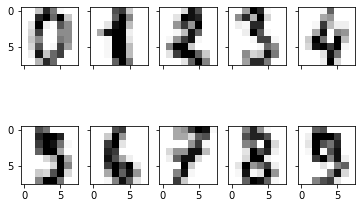

In [5]:
#生成含有两行五列共十张子图的图像。其中fig代表整张图，ax代表子图的序列
fig, ax = plt.subplots(
        nrows=2,
        ncols=5,
#公用x轴和y轴
        sharex=True,
        sharey=True, ) 
#将ax子图序列由2*5展开成1*10，否则无法直接调用ax[9],只能调用ax[1][4]
ax = ax.flatten()
 
for i in range(10):
    ax[i].imshow(digits.data[i].reshape((8,8)), cmap='Greys', interpolation='nearest')
 
plt.show()

In [6]:
digits.target=pd.DataFrame(digits.target)
target_plot=digits.target.apply(pd.value_counts)

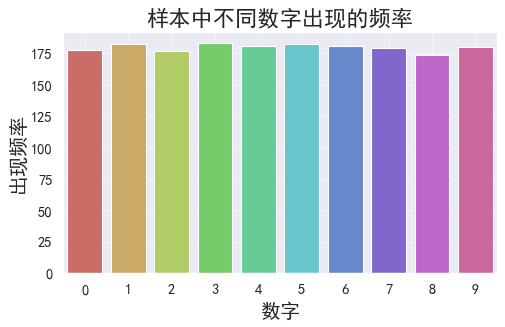

In [7]:
plt.figure(figsize=(7,4),dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')            # 解决Seaborn中文显示问题
pal = sns.color_palette("hls", 10)       # 使用seaborn调色板
sns.barplot(x=target_plot.index,y=target_plot[0],palette=pal)   # 绘制条形图
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('数字', size=18)
plt.ylabel('出现频率', size=18)
plt.title('样本中不同数字出现的频率', size=20)
plt.grid(alpha=0.5)
plt.show()

## 模型训练
    首先将数据集划分为训练集和测试集，分别用高斯朴素贝叶斯，多项式朴素贝叶斯，伯努利朴素贝叶斯算法训练模型。
    然后用classification_report包生成准确率报告

In [8]:
#对所给数据划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3,random_state=33)

In [9]:
#计算程序运行时间，求得开始时间
start=timeit.default_timer()


#GaussianNB(高斯)类
#开始训练模型
GNB=GaussianNB()
GNB.fit(X_train,y_train)    # 利用训练数据对模型参数进行估计
y_predict = GNB.predict(X_test)     # 对参数进行预测
print (f'The Accuracy of G Naive Bayes Classifier is:{GNB.score(X_test,y_test)}')
#输出分类报告
print (classification_report(y_test, y_predict))
#将分类报告转为字典，并提取出不同数字的准确率
dictGNB=classification_report(y_test, y_predict,output_dict=True)
precisionGNB=[]
for i in range(10):
    precisionGNB.append(dictGNB[str(i)]['precision'])


#求得程序结束的时间
end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

The Accuracy of G Naive Bayes Classifier is:0.8592592592592593
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.89      0.81      0.85        63
           2       0.94      0.86      0.90        51
           3       0.91      0.71      0.80        56
           4       0.97      0.81      0.89        43
           5       0.91      0.91      0.91        53
           6       0.92      0.95      0.94        64
           7       0.73      1.00      0.85        47
           8       0.64      0.87      0.73        62
           9       0.93      0.72      0.81        57

    accuracy                           0.86       540
   macro avg       0.88      0.86      0.86       540
weighted avg       0.88      0.86      0.86       540

程序运行时间: 0.012513699999999517 Seconds


In [10]:
#计算程序运行时间，求得开始时间
start=timeit.default_timer()


#MultinomialNB类
MNB=MultinomialNB()
MNB.fit(X_train,y_train)    # 利用训练数据对模型参数进行估计
y_predict = MNB.predict(X_test)     # 对参数进行预测

print (f'The Accuracy of M Naive Bayes Classifier is:{MNB.score(X_test,y_test)}')
print (classification_report(y_test, y_predict))
dictMNB=classification_report(y_test, y_predict,output_dict=True)
precisionMNB=[]
for i in range(10):
    precisionMNB.append(dictMNB[str(i)]['precision'])


#求得程序结束的时间
end=timeit.default_timer()
timeMNB=end-start
print(f'程序运行时间: {timeMNB} Seconds')

The Accuracy of M Naive Bayes Classifier is:0.8907407407407407
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.84      0.81      0.82        63
           2       0.92      0.90      0.91        51
           3       0.98      0.89      0.93        56
           4       0.91      0.93      0.92        43
           5       0.95      0.75      0.84        53
           6       0.97      0.97      0.97        64
           7       0.87      0.98      0.92        47
           8       0.84      0.85      0.85        62
           9       0.73      0.86      0.79        57

    accuracy                           0.89       540
   macro avg       0.90      0.90      0.89       540
weighted avg       0.90      0.89      0.89       540

程序运行时间: 0.025140100000001553 Seconds


In [11]:
#计算程序运行时间，求得开始时间
start=timeit.default_timer()


#BernouliNB类
BNB=BernoulliNB()
BNB.fit(X_train,y_train)    # 利用训练数据对模型参数进行估计
y_predict = BNB.predict(X_test)     # 对参数进行预测、
print (f'The Accuracy of B Naive Bayes Classifier is:{BNB.score(X_test,y_test)}')
print (classification_report(y_test, y_predict))
dictBNB=classification_report(y_test, y_predict,output_dict=True)
precisionBNB=[]
for i in range(10):
    precisionBNB.append(dictBNB[str(i)]['precision'])

    
#求得程序结束的时间
end=timeit.default_timer()
timeBNB=end-start
print(f'程序运行时间: {timeBNB} Seconds')

The Accuracy of B Naive Bayes Classifier is:0.85
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.75      0.67      0.71        63
           2       0.84      0.92      0.88        51
           3       0.88      0.91      0.89        56
           4       0.89      0.91      0.90        43
           5       0.93      0.77      0.85        53
           6       0.95      0.95      0.95        64
           7       0.88      0.96      0.92        47
           8       0.75      0.71      0.73        62
           9       0.71      0.79      0.75        57

    accuracy                           0.85       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.85      0.85      0.85       540

程序运行时间: 0.01029450000000054 Seconds


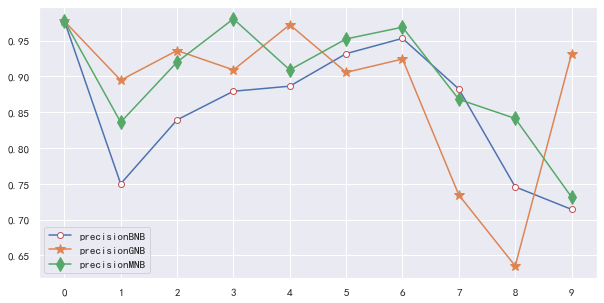

In [12]:
x=list(range(10))
plt.figure(figsize=(10,5))
plt.plot(x,precisionBNB, marker='o', mec='r', mfc='w',label='precisionBNB')
plt.plot(x,precisionGNB, marker='*', ms=10,label='precisionGNB')
plt.plot(x,precisionMNB, marker='d', ms=10,label='precisionMNB')
plt.legend()  # 让图例生效
plt.xticks(x)
plt.show()

## 总结
    程序的运行时间：GNB模型运行时间约0.0411,MNB模型运行的时间约0.0322,BNB模型运行的时间约0.0318，可以认为GNB模型效率偏低。BNB模型运行速度最快
    预测的总准确率：GNB模型的准确率约为0.859，MNB模型的准确率约为0.891，BNB模型的准确率约为0.850。可以认为MNB模型的准确率显著高于其余两个模型
    分类的准确率：根据上面的折线图可以看出对于不同的类别，三个模型各有不同的表现。在三个模型中，MNB模型的表现相对稳定。对于十个不同的类别进行预测，MNB模型的最低准确率和最高准确率都是三个模型中最高的
    综上所述，对于当前数据集，MNB模型的表现更好